<a href="https://colab.research.google.com/github/CrushedKatana/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRACTICUM


1. Go to https://colab.research.google.com/ . After making sure that Google Colab is
connected to your Github , continue by selecting the repository that was used in the
lab last week , rename the file to "Week 10 .ipynb".
2. Import the following libraries that will be used during the following week 6 practicum
trial.
3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,
TOZERO_INV) according to the description from the chart shown above.
4. Create Otsu Thresholding without using the Library. Also display the threshold value
when you use Otsu's, as shown in the following image . (use the
image lena_gs_lc2.jpg so that it really looks different between the otsu's results and
the usual global threshold)
5. Create a histogram from a segmented image, the histogram is only in the foreground
image. Use the Lily or Leaves image provided in the images folder .
Instructions:

    a. You can use cv.calcHist to display a histogram.

    b. Open the folloiwng link https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

    c. From the link, note that cv.calcHist has one of the parameters, namely mask.If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called Image Segment).

6. Perform color segmentation on the image "peppers.jpg", display only yellow colors . (Hint: you can use K-Means to display only certain colors)
7.

### 1. Go to https://colab.research.google.com/ . After making sure that Google Colab is connected to your Github , continue by selecting the repository that was used in the



Then import the existing folder on your Drive as follows.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import the following libraries that will be used during the following week 6 practicum trial.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 3.  Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) according to the description from the chart shown above.

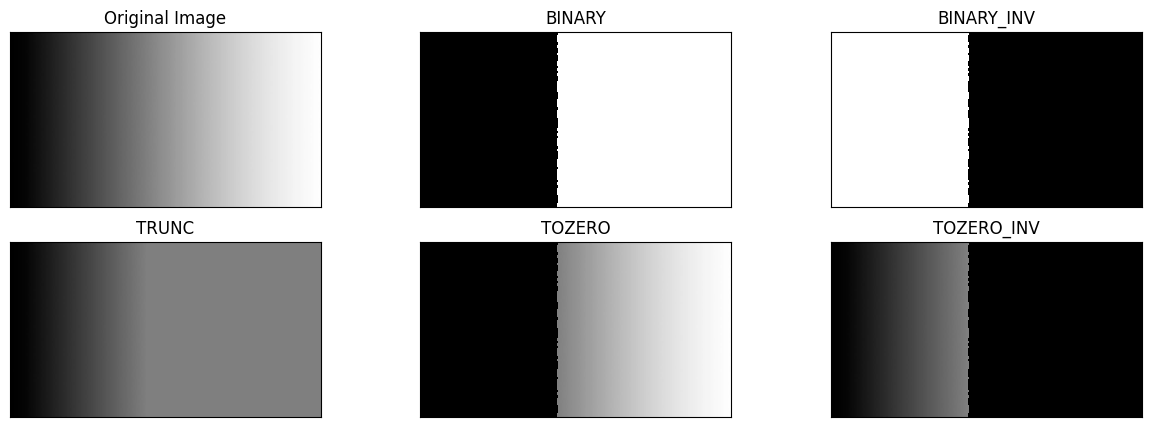

In [3]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv2.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain
# itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 4. Create Otsu Thresholding without using the Library. Also display the threshold value when you use Otsu's, as shown in the following image . (use the image lena_gs_lc2.jpg so that it really looks different between the otsu's results and the usual global threshold)

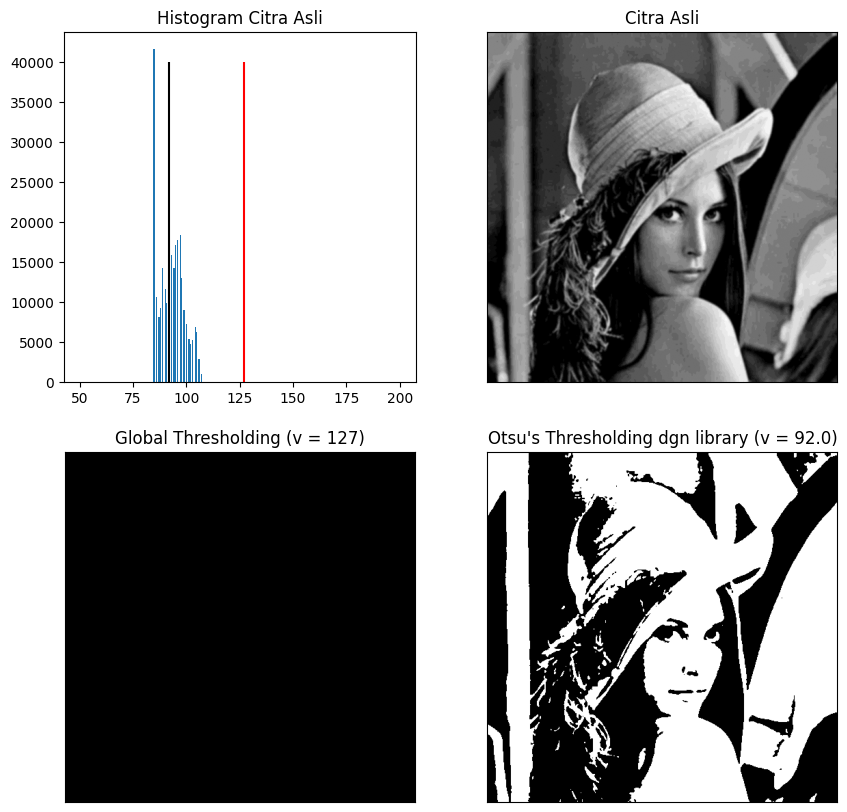

In [8]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))

for i in range(len(citra3)):
    plt.subplot(2,2,i+1),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 5. Create a histogram from a segmented image, the histogram is only in the foreground
image. Use the Lily or Leaves image provided in the images folder .
Instructions:

    a. You can use cv.calcHist to display a histogram.

    b. Open the folloiwng link https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

    c. From the link, note that cv.calcHist has one of the parameters, namely mask.If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called Image Segment).

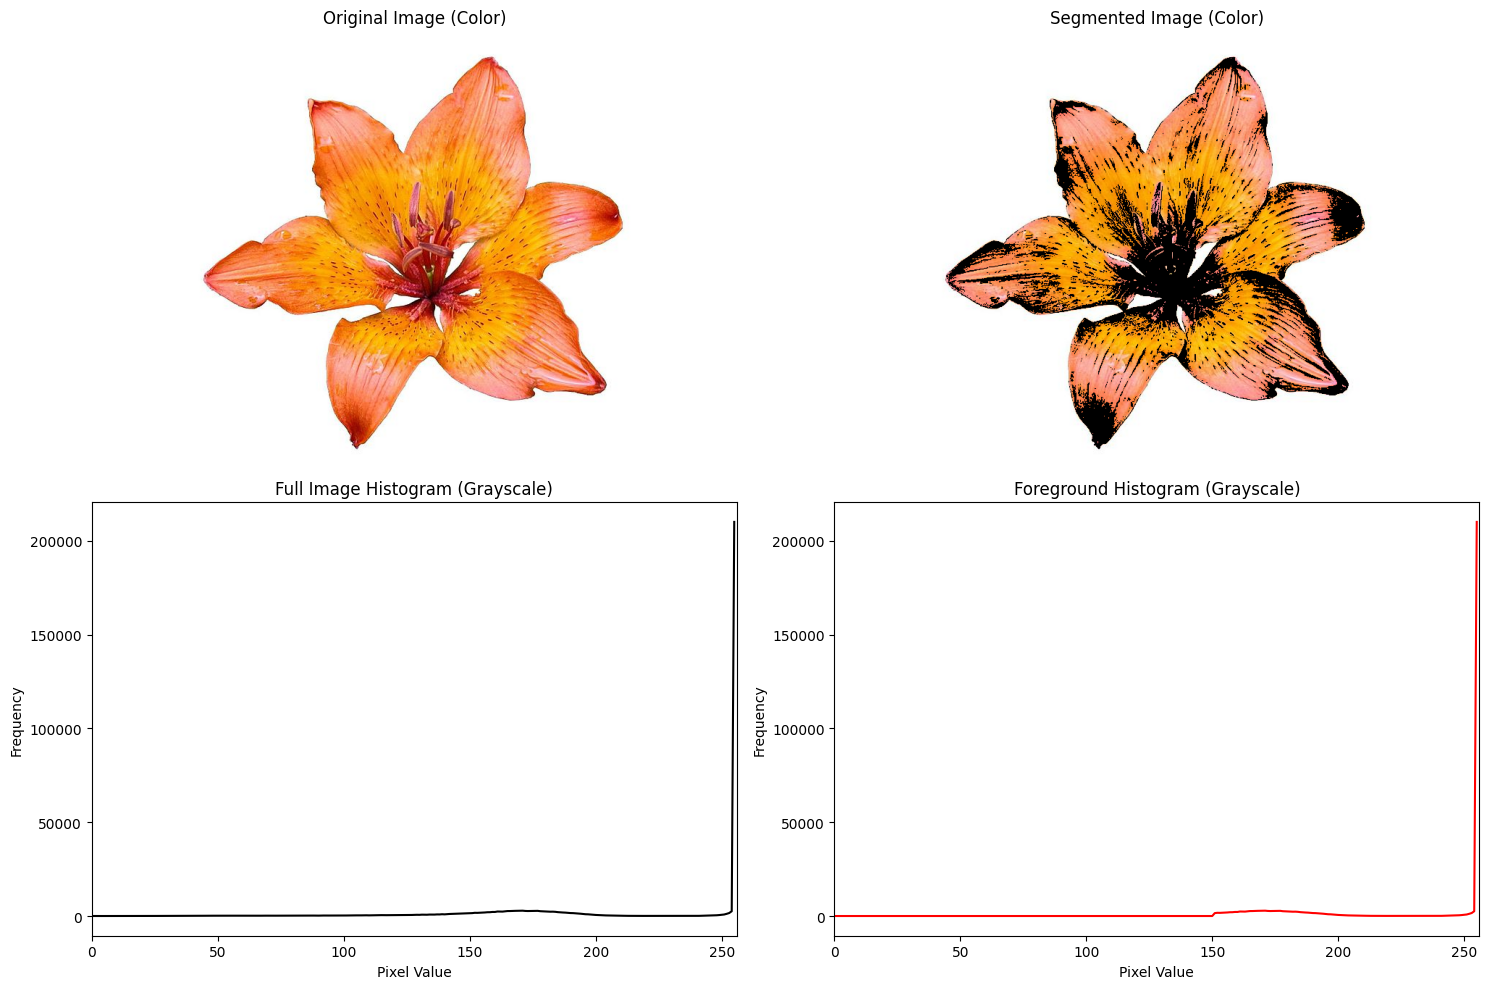

In [5]:
# Load the image in color
img_path = '/content/drive/MyDrive/PCVK/Images/lily.jpg' # Using Lily.jpg as an example
img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Keep grayscale for histogram calculation

if img_color is None or img_gray is None:
    print(f"Error: Image not found at {img_path}")
else:

    ret, mask = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

    hist_full = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

    hist_masked = cv2.calcHist([img_gray], [0], mask, [256], [0, 256])

    segmented_img_color = cv2.bitwise_and(img_color, img_color, mask=mask)


    plt.figure(figsize=(15, 10))

    # Display Original Image (in color)
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title('Original Image (Color)')
    plt.axis('off')

    # Display Segmented Image (in color)
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(segmented_img_color, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image (Color)')
    plt.axis('off')

    # Display Full Image Histogram (Grayscale)
    plt.subplot(2, 2, 3)
    plt.plot(hist_full, color='black')
    plt.title('Full Image Histogram (Grayscale)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    # Display Masked Foreground Histogram (Grayscale)
    plt.subplot(2, 2, 4)
    plt.plot(hist_masked, color='red')
    plt.title('Foreground Histogram (Grayscale)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])


    plt.tight_layout()
    plt.show()

### 6. Perform color segmentation on the image "peppers.jpg", display only yellow colors . (Hint: you can use K-Means to display only certain colors)

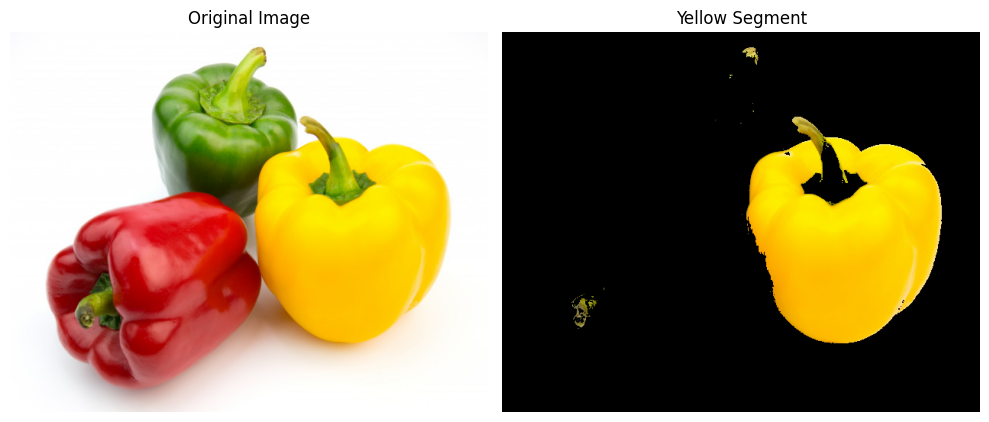

In [6]:
# Load the image
img_path = '/content/drive/MyDrive/PCVK/Images/peppers.jpg'
img = cv2.imread(img_path)

if img is None:
    print(f"Error: Image not found at {img_path}")
else:
    # Convert image to HSV color space
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the range for yellow color in HSV
    # These values might need to be adjusted based on the specific image
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Create a mask using the inRange function
    mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

    # Apply the mask to the original image
    yellow_segment = cv2.bitwise_and(img, img, mask=mask)

    # Display the original image and the segmented image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(yellow_segment, cv2.COLOR_BGR2RGB))
    plt.title('Yellow Segment')
    plt.axis('off')

    plt.tight_layout()
    plt.show()